# Demo Notebook

/Users/martintomov/sd-pytorch/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps


100%|██████████| 50/50 [00:22<00:00,  2.24it/s]


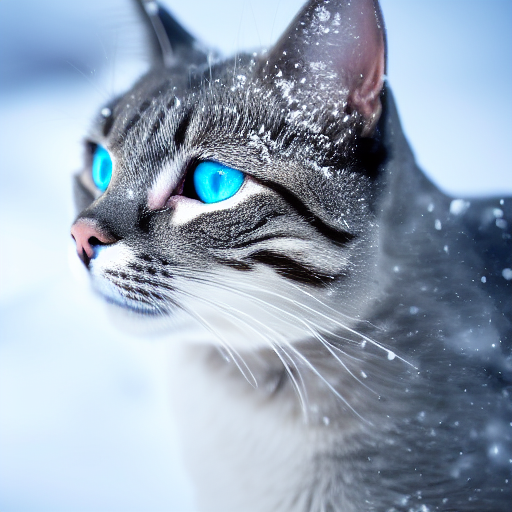

In [1]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch
from IPython.display import display

DEVICE = "cpu"

# Configure device preferences here, I'm using MPS for Apple Silicon GPU:
ALLOW_CUDA = False
ALLOW_MPS = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_available() and ALLOW_MPS):
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/tokenizer_vocab.json", merges_file="../data/tokenizer_merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# TEXT TO IMAGE PROMPTS
# prompt = "A turtle swimming away in clear ocean water, highly detailed, realistic, ultra sharp, cinematic, 100mm lens, 8k resolution."
# prompt = "An orange cat playing with tennis balls in a green backyard, highly detailed, realistic, ultra sharp, cinematic, 100mm lens, 8k resolution."
# prompt = "A close up of man posing for a picture on a tropical island holding a coctail in hand, highly detailed, realistic, ultra sharp, cinematic, 100mm lens, 8k resolution."
# prompt = "A medieval knight standing in a misty forest, highly detailed, realistic, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A cat under the snow with blue eyes, covered by snow, highly detailed, realistic, ultra sharp, cinematic, 100mm lens, 8k resolution."

# IMAGE TO IMAGE PROMPTS
# prompt = "A turtle, realistic, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = "" 
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

# IMAGE TO IMAGE (uncomment the following input_image line to use image to image)

input_image = None
image_path = "../img/turtle.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will be further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)